In [1]:
import torch

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Load Data

In [2]:
# In this code example we're gonna use different example, using data from Fish Market dataset
df = pd.read_csv("dataset.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


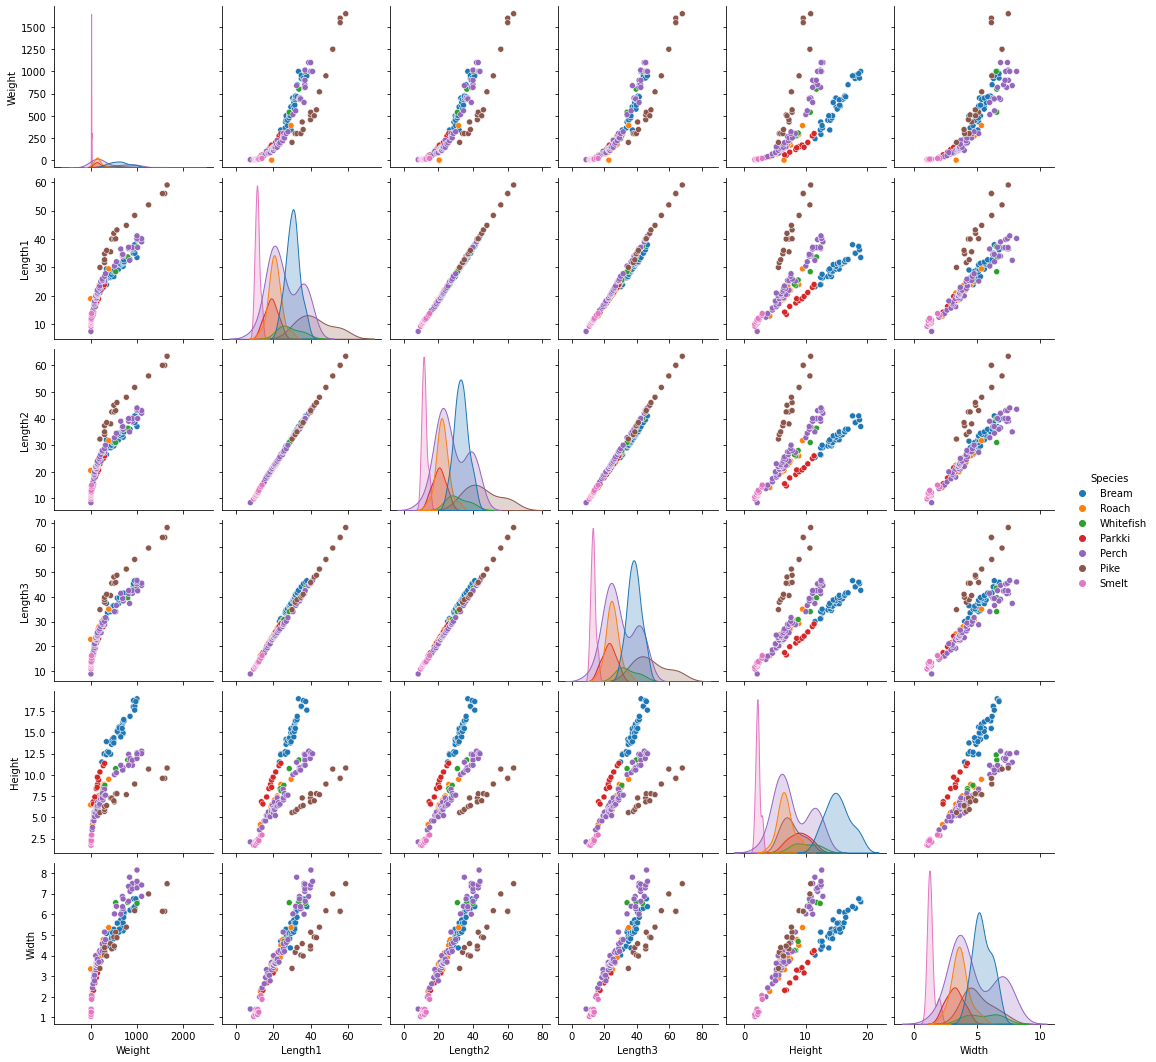

In [3]:
sns.pairplot(df, hue='Species')
plt.show()

In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Sample Data

In [5]:
# We're gonna use data from one species (Bream) and sample several data points
# The independent variable (x) will be Height
# The dependent variable (y) will be Width
df_sample = df[(df['Species'] == 'Bream') & (df.index.isin([0, 2, 7, 11, 13, 17, 22, 27, 28, 32]))][['Species', 'Height', 'Width']]
df_sample

,Species,Height,Width
0,Bream,11.5200,4.0200
2,Bream,12.3778,4.6961
7,Bream,12.6700,4.6900
11,Bream,14.3714,4.8146
13,Bream,13.9129,5.0728
17,Bream,14.9380,5.1975
22,Bream,15.5227,5.2801
27,Bream,16.5170,5.8515
28,Bream,16.8896,6.1984
32,Bream,18.7542,6.7497


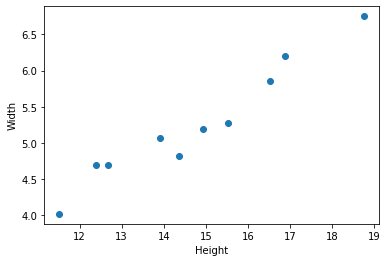

In [6]:
X = df_sample['Height']
y = df_sample['Width']

plt.xlabel("Height")
plt.ylabel("Width")
plt.scatter(X, y)
plt.show()

### Define Function & Initial Param

In [7]:
# We want to fit a line to the above data
# A line has an equation of y = mx + c
# We define a function to calculate y_predicted given parameters (m, c) and data (x)
def linreg_forward(m, x, c):
    return m * x + c

In [8]:
# We define a function to calculate the cost function (error) of the predicted results
def squared_error(y_predicted, y_actual):
    return (y_predicted - y_actual)**2

In [9]:
# We can start with an arbitrary value of parameters
np.random.seed(5)
m = torch.tensor(np.random.randn(1), requires_grad=True)
c = torch.tensor(np.random.randn(1), requires_grad=True)

m, c

(tensor([0.4412], dtype=torch.float64, requires_grad=True),
 tensor([-0.3309], dtype=torch.float64, requires_grad=True))

### Start SGD

#### Step 1: Start with one data sample

In [10]:
df_sample_shuffled = df_sample.sample(frac=1, random_state=5) # Shuffle
xi = torch.tensor(df_sample_shuffled['Height'].values[0])
yi = torch.tensor(df_sample_shuffled['Width'].values[0])

xi, yi

(tensor(18.7542, dtype=torch.float64), tensor(6.7497, dtype=torch.float64))

#### Step 2: Forward pass

In [11]:
y_predicted = linreg_forward(m, xi, c)
y_predicted

tensor([7.9440], dtype=torch.float64, grad_fn=<AddBackward0>)

#### Step 3: Calculate the cost function (error)

In [12]:
error = squared_error(y_predicted, yi)
error

tensor([1.4263], dtype=torch.float64, grad_fn=<PowBackward0>)

#### Step 4: Backprop, calculate the derivatives of cost function w.r.t. to parameters (m, c) 

In [13]:
# This is calculated automatically using pytorch
error.backward()

In [14]:
# The gradient of parameter m, c in current training sample
m.grad, c.grad

(tensor([44.7962], dtype=torch.float64), tensor([2.3886], dtype=torch.float64))

In [15]:
# This is calculated manually by calculating derivative w.r.t. to each parameters

# Given the cost function squared_error = (y_predicted - y_actual)^2
# We need find the derivative of cost function w.r.t. y_predicted
# To calculate that, first we need to find the derivative of cost function w.r.t. to x, which x represents = (y_predicted - y_actual), which will be = 2x or 2(y_predicted - y_actual)
# Then, we find the derivative of x w.r.t. y_predicted, since x = (y_predicted - y_actual), the derivative which will be = 1
# Lastly, we multiply derivative of cost function w.r.t. x and derivative of x w.r.t. y_predicted, which will be = 2(y_predicted - y_actual) * 1 = 2(y_predicted - y_actual)

# We now calculate the derivative of the cost function w.r.t. to model parameter m
# The derivative will be derivative of cost function w.r.t. to y_predicted * derivative of y_predicted w.r.t. model parameter m
# We got the derivatives of y_predicted w.r.t. model parameter m is = x
# So, the derivative of the cost function w.r.t. to model parameter m will be = 2(y_predicted - y_actual) * x = 2x(y_predicted - y_actual)

# We now calculate the derivative of the cost function w.r.t. to model parameter c
# The derivative will be derivative of cost function w.r.t. to y_predicted * derivative of y_predicted w.r.t. model parameter c
# We got the derivatives of y_predicted w.r.t. model parameter c is = 1
# So, the derivative of the cost function w.r.t. to model parameter c will be = 2(y_predicted - y_actual) * 1 = 2(y_predicted - y_actual)

grad_m = 2 * xi * (y_predicted.item() - yi)
grad_c = 2 * (y_predicted.item() - yi)

grad_m, grad_c

(tensor(44.7962, dtype=torch.float64), tensor(2.3886, dtype=torch.float64))

#### Step 5: Update weight parameters

In [16]:
# Here is the old m and c value
m, c

(tensor([0.4412], dtype=torch.float64, requires_grad=True),
 tensor([-0.3309], dtype=torch.float64, requires_grad=True))

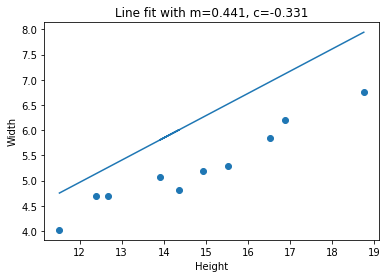

In [17]:
plt.xlabel("Height")
plt.ylabel("Width")

plt.scatter(X, y)
plt.plot(X, m.item() * X + c.item())

plt.title("Line fit with m=%s, c=%s" % (round(m.item(), 3), round(c.item(), 3)))
plt.show()

In [18]:
# Set learning rate to update the weight parameter
lr = 0.0001
m = m - (lr * grad_m)
c = c - (lr * grad_c)

In [19]:
# New model parameters
m, c

(tensor([0.4367], dtype=torch.float64, grad_fn=<SubBackward0>),
 tensor([-0.3311], dtype=torch.float64, grad_fn=<SubBackward0>))

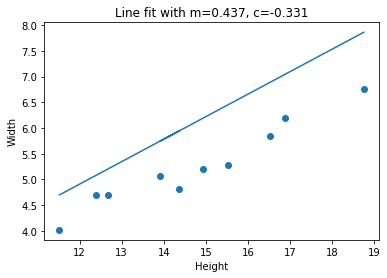

In [20]:
plt.xlabel("Height")
plt.ylabel("Width")

plt.scatter(X, y)
plt.plot(X, m.item() * X + c.item())

plt.title("Line fit with m=%s, c=%s" % (round(m.item(), 3), round(c.item(), 3)))
plt.show()

#### Step 6: Repeat step 1-5 to all training data

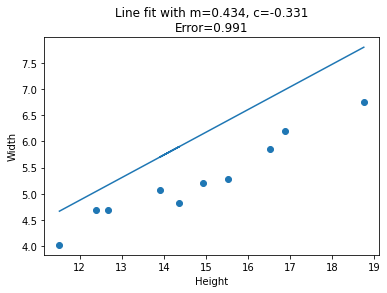

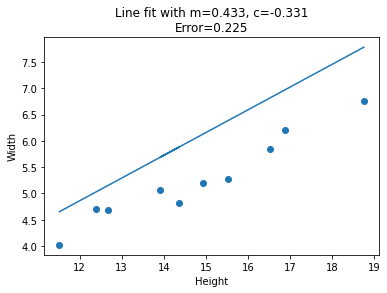

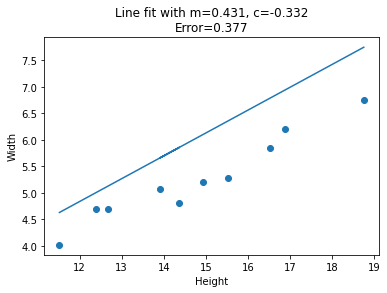

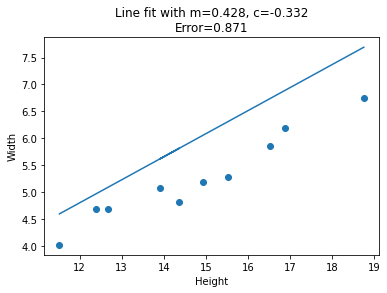

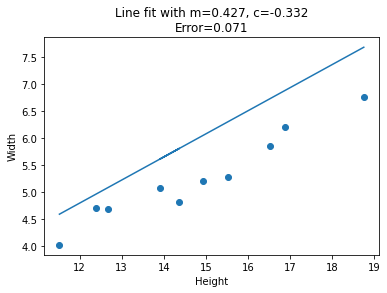

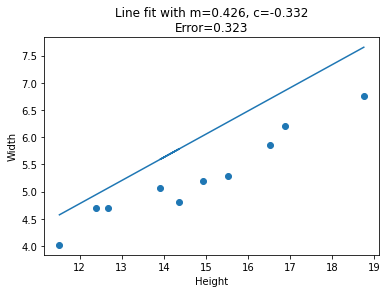

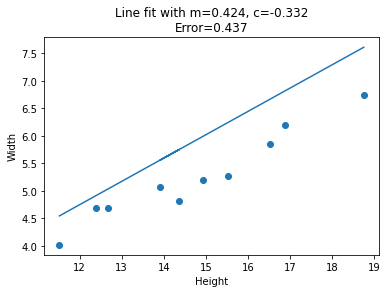

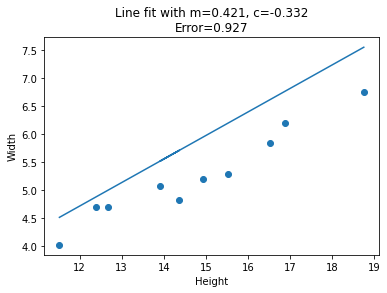

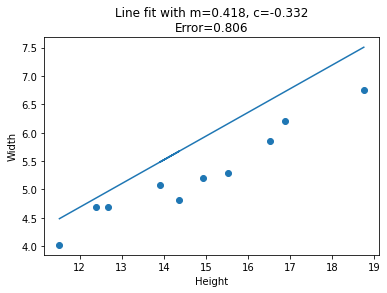

In [21]:
squared_error_epoch = 0
for i in range(1, len(df_sample_shuffled)):
    # Step 1
    xi = torch.tensor(df_sample_shuffled['Height'].values[i])
    yi = torch.tensor(df_sample_shuffled['Width'].values[i])
    
    # Step 2
    y_predicted = linreg_forward(m, xi, c)
    
    # Step 3
    error = squared_error(y_predicted, yi)
    squared_error_epoch += error
    
    # Step 4
    grad_m = 2 * xi * (y_predicted.item() - yi)
    grad_c = 2 * (y_predicted.item() - yi)
    
    # Step 5
    m = m - (lr * grad_m)
    c = c - (lr * grad_c)
    
    plt.xlabel("Height")
    plt.ylabel("Width")

    plt.scatter(X, y)
    plt.plot(X, m.item() * X + c.item())

    plt.title("Line fit with m=%s, c=%s\nError=%s" % (round(m.item(), 3), round(c.item(), 3), round(error.item(), 3)))
    plt.show()

In [22]:
print("MSE All Sample: %s" % round(squared_error_epoch.item()/(len(df_sample_shuffled)-1), 3))

MSE All Sample: 0.559


#### Step 7: Repeat step 1-6 until converge

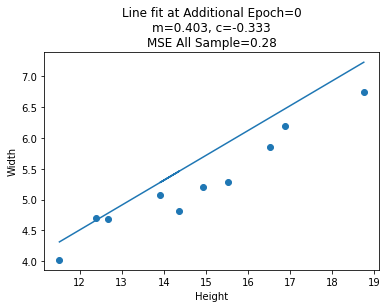

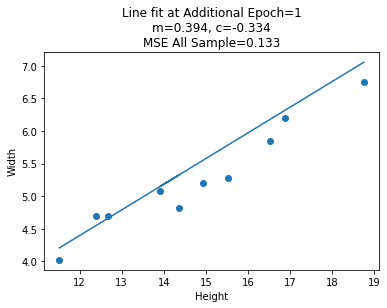

In [23]:
epoch = 2
for j in range(epoch):
    squared_error_epoch = 0
    for i in range(0, len(df_sample_shuffled)):
        # Step 1
        df_sample_shuffled = df_sample.sample(frac=1, random_state=5+j)
        xi = torch.tensor(df_sample_shuffled['Height'].values[i])
        yi = torch.tensor(df_sample_shuffled['Width'].values[i])

        # Step 2
        y_predicted = linreg_forward(m, xi, c)

        # Step 3
        error = squared_error(y_predicted, yi)
        squared_error_epoch += error.item()

        # Step 4
        grad_m = 2 * xi * (y_predicted.item() - yi)
        grad_c = 2 * (y_predicted.item() - yi)

        # Step 5
        m = m - (lr * grad_m)
        c = c - (lr * grad_c)

    plt.xlabel("Height")
    plt.ylabel("Width")

    plt.scatter(X, y)
    plt.plot(X, m.item() * X + c.item())

    plt.title("Line fit at Additional Epoch=%s\nm=%s, c=%s\nMSE All Sample=%s" % (j, round(m.item(), 3), round(c.item(), 3), round(squared_error_epoch/len(df_sample_shuffled), 3)))
    plt.show()